In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import INPUT_DATA_DIR
sns.set_theme()

In [65]:
def plot_ablate(title, path):
    df = pd.read_csv(INPUT_DATA_DIR / 'musicgen-ablation' / path)
    df['eval'] = df['eval'].apply(lambda x: x.split('/')[-1])
    fig, ax = plt.subplots(figsize=(20, 3))
    sns.barplot(df, x='eval', y='score', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('layer')
    if 'inf' not in path:
        return
    for i, bar in enumerate(ax.patches):
        r2_val = df['inf_r2'].iloc[i]
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height,
            f'R²={r2_val:.2f}',
            ha='center',
            va='bottom',
            rotation=45,          # <-- rotate text
            rotation_mode='anchor'
        )
        # ax.text(index, row['inf_r2'] + 1, f"R²={row['inf_r2']:.2f}", color='black', ha="center")

2025-03-31 03:53:25,016 INFO Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-31 03:53:25,018 INFO Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-31 03:53:25,045 INFO Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-31 03:53:25,047 INFO Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


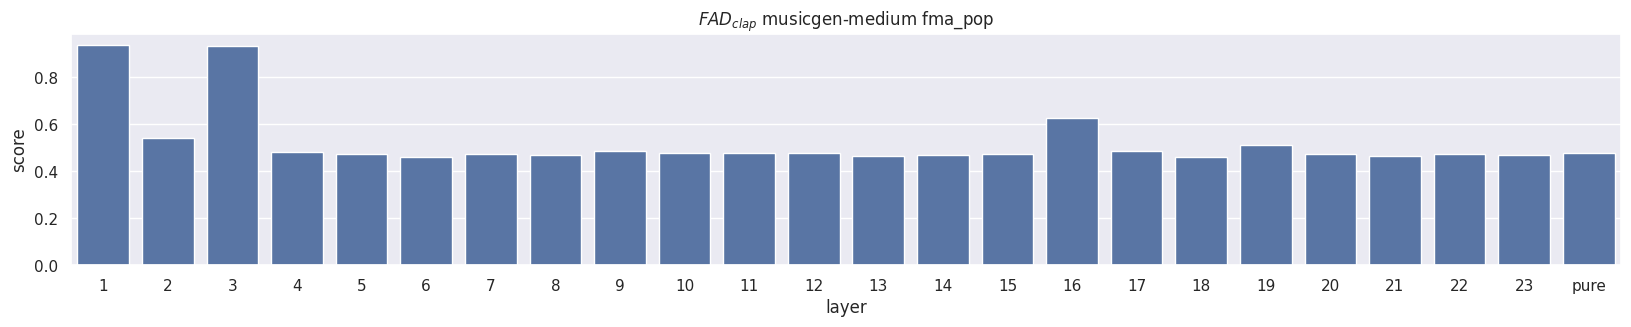

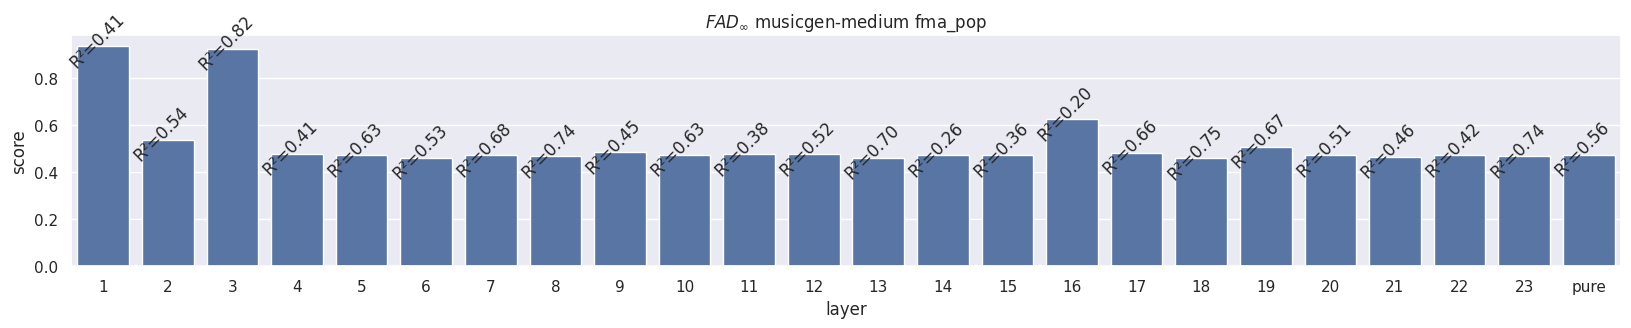

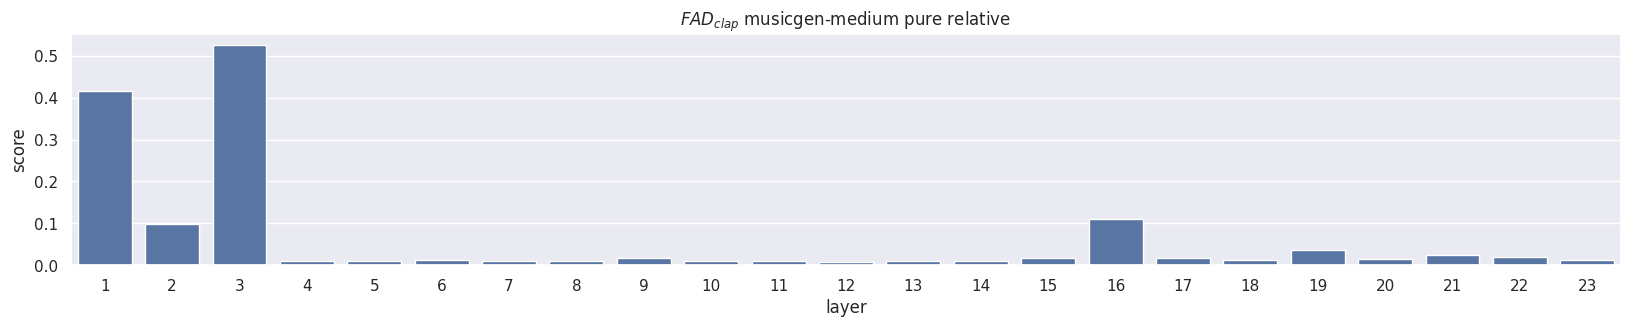

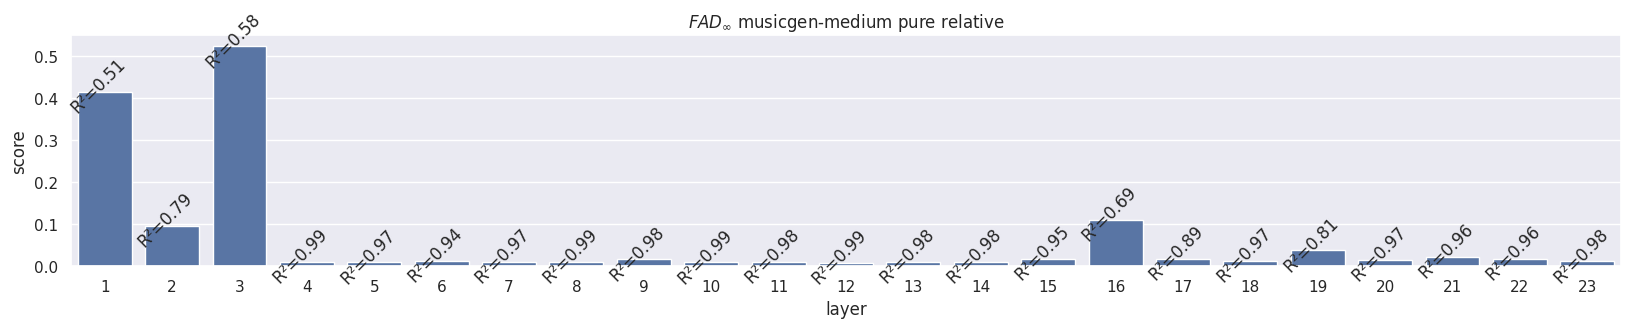

In [66]:
plot_ablate(r"$FAD_{clap}$ musicgen-medium fma_pop",'medium-bench-fad-comp.csv')
plot_ablate(r"$FAD_{\infty}$ musicgen-medium fma_pop",'medium-bench-fad-comp-inf.csv')
plot_ablate(r"$FAD_{clap}$ musicgen-medium pure relative",'medium-bench-fad-comp-relative.csv')
plot_ablate(r"$FAD_{\infty}$ musicgen-medium pure relative",'medium-bench-fad-comp-relative-inf.csv')